In [52]:
from ciphers import transposition_cipher, vigenere_cipher, caesar_cipher
import matplotlib.pyplot as plt
from Avalanche_effect import initial_avalanche_effect, repeated_avalanche_effect, repeated_avalanche_effect_all_ascii, repeated_avalanche_effect_CBC, repeated_avalanche_effect_caesar
from Cbc import encrypt_cbc, decrypt_cbc

In [53]:
plaintext = "Marco Bologna Security and Vulnerability in Networks"
transposition_key = "45312" 
vigenere_key = "KEY"
caesar_key = 2

# Caesar Cypher and Transposition Cypher

In [54]:
substituted_text = caesar_cipher(plaintext, caesar_key)
final_ciphertext = transposition_cipher(substituted_text, transposition_key)
print(f"Substitution first: {final_ciphertext}")

transposed_text = transposition_cipher(plaintext, transposition_key)
final_ciphertext = caesar_cipher(transposed_text, caesar_key)
print(f"Transposition first: {final_ciphertext}")

Substitution first: eqgvxtkptxqieawcvgmxtnukfgnpqxodpwcndavucqctppkkyx
Transposition first: eqgvxtkptzqieawcvgmztnukfgnpqzodpwcndavucqctppkkyz


The only difference between the 2 modalities are the carachters added at the end of the text (by the transposition cypher), in the first case theese characters remains the same, in the second case they are changed by the caesar cypher.
In Any case, theese characters are not part of the original text, so there is no difference in the final result.

Bit diversi: 1
char diversi: 1
eqgvxtkptzqieawcvgmztnukfgnpqzodpwcndavucqctppkkyz
eqgvxtkptzqieawcvgmztnukfgnpqzndpwcndavucqctppkkyz
Bit diversi: 1
char diversi: 1
xvcomsyxvazbybhbewrbirgiwrrcemgvseviqpersmkxppffsm
xvcomsyxvazbybhbewrbirgiwrrcemgvsevippersmkxppffsm
Bit diversi: 1
char diversi: 1
qxdtkgggzuocjdyoxtroezayieurmhzubdktikurxadgttxsoh
qxdtkgggzuocjdyoxtroezayieurmhzubdktikurxadgttxroh
Bit diversi: 1
char diversi: 1
vbftaofwiqmwaqkjmtvjfilvctdmfusiqqggbvzvziezbwwkcz
vbftaofwiqmwaqkjmtvjfilvctdmftsiqqggbvzvziezbwwkcz
Bit diversi: 1
char diversi: 1
vksxxhsbbecsmlewixdbhycvnosxgmxqolhvuibydhyokfkdky
vksxxhsbbecsmlevixdbhycvnosxgmxqolhvuibydhyokfkdky
Bit diversi: 1
char diversi: 1
zdnfxindqmzggdpojamaudozezqkafxjeyjqzxfhmuukauswjm
zdnfxindqmzggdpojamaudozezqkafxjexjqzxfhmuukauswjm
Bit diversi: 4
char diversi: 1
hsfobcahmlzorcghljcopficqmgzwybkbqwbzsowfpilfslbwu
hsfobczhmlzorcghljcopficqmgzwybkbqwbzsowfpilfslbwu
Bit diversi: 1
char diversi: 1
qoeeeysqnydniqsayyhwhjtlkbdukdjebjrodd

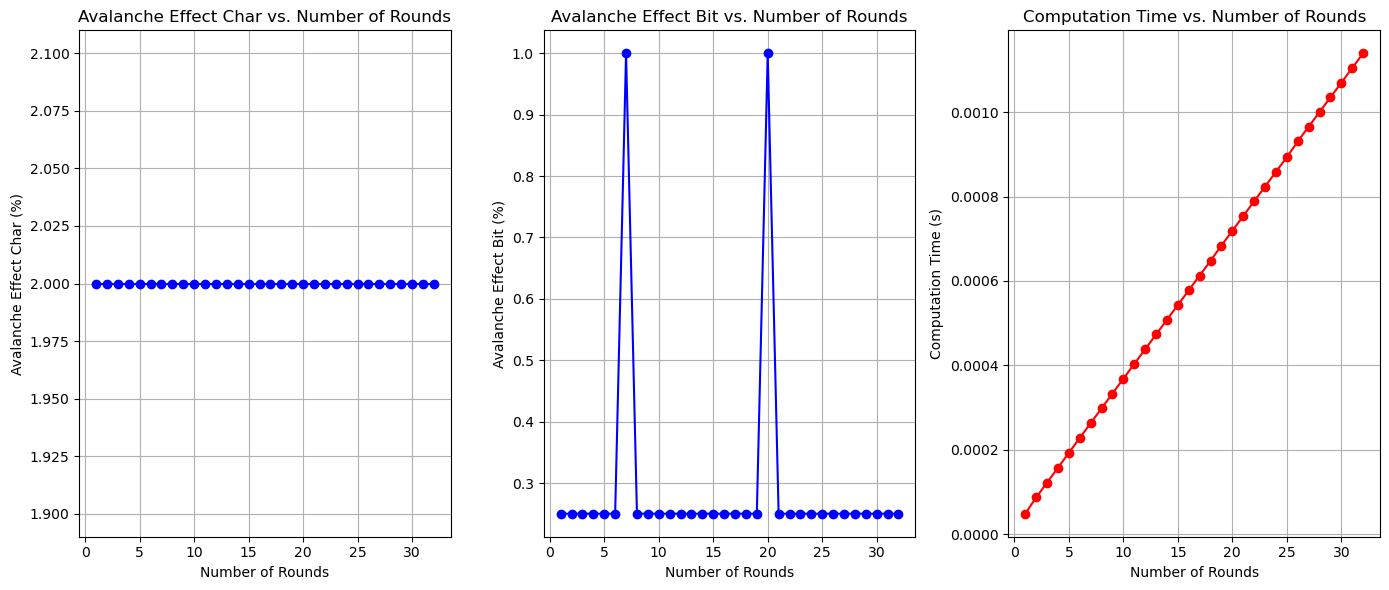

In [55]:
rounds = 32
avalanche_effects_char,avalanche_effects_bit, computation_times = repeated_avalanche_effect_caesar(plaintext, transposition_key, caesar_key, rounds)
for round_num, (effect_char,effect_bit, time_taken) in enumerate(zip(avalanche_effects_char,avalanche_effects_bit, computation_times), start=1):
    print(f"Round {round_num}: diff_char_percentage = {effect_char:.2f}%, diff_bit_percentage = {effect_bit:.2f}%, Computation Time = {time_taken:.6f} seconds")
# Traccia i risultati
plt.figure(figsize=(14, 6))

# Effetto Valanga
plt.subplot(1, 3, 1)
plt.plot(range(1, rounds + 1), avalanche_effects_char, marker='o', color='b')
plt.title('Avalanche Effect Char vs. Number of Rounds')
plt.xlabel('Number of Rounds')
plt.ylabel('Avalanche Effect Char (%)')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(range(1, rounds + 1), avalanche_effects_bit, marker='o', color='b')
plt.title('Avalanche Effect Bit vs. Number of Rounds')
plt.xlabel('Number of Rounds')
plt.ylabel('Avalanche Effect Bit (%)')
plt.grid(True)
# Tempo di Computazione
plt.subplot(1, 3, 3)
plt.plot(range(1, rounds + 1), computation_times, marker='o', color='r')
plt.title('Computation Time vs. Number of Rounds')
plt.xlabel('Number of Rounds')
plt.ylabel('Computation Time (s)')
plt.grid(True)


plt.tight_layout()
plt.show()

# Vigenere Cypher and Transposition Cypher

In [56]:
substituted_text = vigenere_cipher(plaintext, vigenere_key)
final_ciphertext = transposition_cipher(substituted_text, transposition_key)
print(f"Substitution first: {final_ciphertext}")

transposed_text = transposition_cipher(plaintext, transposition_key)
final_ciphertext = vigenere_cipher(transposed_text, vigenere_key)
print(f"Transposition first: {final_ciphertext}")

Substitution first: oprnvcjlkxoucphnbmgxpzykbylgsxwsymiofjggeqovgizqjx
Transposition first: mscvjvbiifbxzmacrykqvvpzowtqsizpkgbyvyetyhsrbnzvjf


In [57]:
original_ciphertext, modified_ciphertext, diff_char_percentage,diff_bit_percentage = initial_avalanche_effect(plaintext, transposition_key,
                                                                                     vigenere_key)
print(f"Original Ciphertext: {original_ciphertext}")
print(f"Modified Ciphertext: {modified_ciphertext}")
print(f"Percentage of Differing Characters: {diff_char_percentage:.2f}%")
print(f"Percentage of Differing Bits: {diff_bit_percentage:.2f}%")

char diversi: 2
oprnvcjlkxoucphnbmgxpzykbylgsxwsymiofjggeqovgizqjx
nprnvcjlkxoucphnbmgxpzykbylgsxvsymiofjggeqovgizqjx
Bit diversi: 2
Original Ciphertext: oprnvcjlkxoucphnbmgxpzykbylgsxwsymiofjggeqovgizqjx
Modified Ciphertext: nprnvcjlkxoucphnbmgxpzykbylgsxvsymiofjggeqovgizqjx
Percentage of Differing Characters: 4.00%
Percentage of Differing Bits: 0.50%


2 letters changed, one is due to the flipped bit in the plaintext, the oter is due to the flipped bit in the autokey of vigenere.

In [58]:
# Esempio di utilizzo
rounds = 32
avalanche_effects_char,avalanche_effects_bit, computation_times = repeated_avalanche_effect(plaintext, transposition_key, vigenere_key, rounds)
for round_num, (effect_char,effect_bit, time_taken) in enumerate(zip(avalanche_effects_char,avalanche_effects_bit, computation_times), start=1):
    print(f"Round {round_num}: diff_char_percentage = {effect_char:.2f}%, diff_bit_percentage = {effect_bit:.2f}%, Computation Time = {time_taken:.6f} seconds")


char diversi: 2
oprnvcjlkxoucphnbmgxpzykbylgsxwsymiofjggeqovgizqjx
nprnvcjlkxoucphnbmgxpzykbylgsxvsymiofjggeqovgizqjx
Bit diversi: 2
char diversi: 4
bmdtzqiuzrkgbyaialwwpgztvhvruwytzpbwcmnwtweqfvkrwu
amdtzqhuzrkgbyaialwwpgztvhvruwxtzpbwbmnwtweqfvkrwu
Bit diversi: 5
char diversi: 8
upieibnjjrlzgwbruybebtslvmvnawltejagpvfzqbfyconrja
tpieibmjjrlygwbruxbebtslvmvnawktejagovfzqafyconqja
Bit diversi: 18
char diversi: 15
ykhsmmuloxxeayortodngrxzwiavetejuxzeyklttriqugtygl
xkhsmmtloxxdzyortncngrxywiavesdjuxyexklttqhqugtxfl
Bit diversi: 25
char diversi: 28
qavufmbpjmwrsgntirlefxxckrnjbsitirufzydoomsruznvcj
pavtemapjlwqrgnshqkefxwbkrmiarhtiqtfyydnolrrtynubj
Bit diversi: 46
char diversi: 37
kvcehszifbfnemhfnngwtueebtasgpahllwornmrevaoipuqpe
ivccgrxifzeldlhdmlewttcdaszrenzhljvnpnmpetznhntooe
Bit diversi: 71
char diversi: 47
oxrlxzlasecaujvpdidyapfuatajryuunjgxszrpzdszaenchi
kwphwwizrbbwsitmceaxaocsyryiovstmgeuqyrmzzqxxclyfg
Bit diversi: 110
char diversi: 50
zrlsukdoylupvbpyahdvpxyddjlfhcyqcjiydkywbw

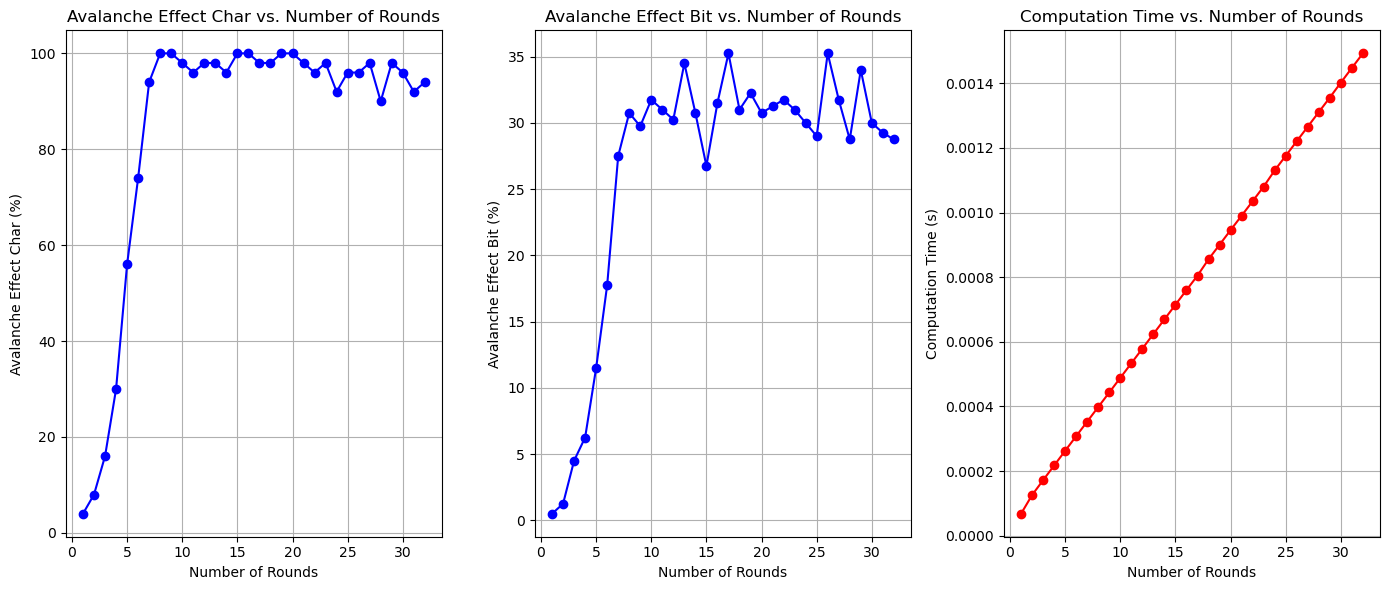

In [59]:

# Traccia i risultati
plt.figure(figsize=(14, 6))

# Effetto Valanga
plt.subplot(1, 3, 1)
plt.plot(range(1, rounds + 1), avalanche_effects_char, marker='o', color='b')
plt.title('Avalanche Effect Char vs. Number of Rounds')
plt.xlabel('Number of Rounds')
plt.ylabel('Avalanche Effect Char (%)')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(range(1, rounds + 1), avalanche_effects_bit, marker='o', color='b')
plt.title('Avalanche Effect Bit vs. Number of Rounds')
plt.xlabel('Number of Rounds')
plt.ylabel('Avalanche Effect Bit (%)')
plt.grid(True)
# Tempo di Computazione
plt.subplot(1, 3, 3)
plt.plot(range(1, rounds + 1), computation_times, marker='o', color='r')
plt.title('Computation Time vs. Number of Rounds')
plt.xlabel('Number of Rounds')
plt.ylabel('Computation Time (s)')
plt.grid(True)

plt.tight_layout()
plt.show()


Bit diversi: 3
char diversi: 2
®±yÕÍÓÕÐìÞËØÝ¿ËçºÔñÀáÙç·çÄéá»ß²ËÓÝÓÔ§ÙÄ»ÈåÙß
®±yÕÍÓÕÐìÞËØÝ¿ËçºÔñÀáÙç·çÄéáºß±ËÓÝÓÔ§ÙÄ»ÈåÙß
Bit diversi: 6
char diversi: 4
 Ú$¼v²¢¬»v¤¡±©aQ¬
%²úc½D¬T¥YuiÓ¡³Äk§zWpÄ¨£Â
 Ú$¼v²¡¬»u¤¡±©aQ¬
%²úc½D¬T¥YuiÓ¡³Äk§zWpÄ¨¢Â
Bit diversi: 17
char diversi: 7
 
h]-6SE:I3Ûc^âw8²Ê"u¦ nc |"·É×è3÷I;T6=Yü.
 
h]-6SE9I2Ûc^âw7²Ê!u¦ nc |"·É×è3÷I;S6=Yü-
Bit diversi: 19
char diversi: 13
³¢Æ·é²ßä;| gãUðXalhmèZß$·0î:Ô
3.½I#ÛeÃhÖ
³¢Æ·é²Þä;| fãTðX`lfmèYß$·0î9Ô
2.½H#ÛdÃh Ö
Bit diversi: 33
char diversi: 18
G#[9<u¦Ió4kvqÏQFmVÆ2£{J#÷Ú;
D#[8<u¦Iñ4ktqÎQFlVÆ1£{I#÷Ú9
Bit diversi: 38
char diversi: 19
fá/¶
jÆ+Mºçxµ*1µÆ]²7ùK`ì~Ö×X¶½Üì¨tY#Sä®µ
eá/²
xµ(1µÃ{]²3ùK]ì}Ö×U¶¸Üì¥tY#Qä®²
Bit diversi: 55
char diversi: 19
Ï@à#à¨4,²ÈBe<aùrEéoäañ»Qß_cu¿o9òk½üáY0ÿd`«
ýÏ@Ú#à¥4,®ÈBe3aùjEéjäaë»QØ_
cr¿j9ík½öáY)ÿd`¦
Bit diversi: 69
char diversi: 

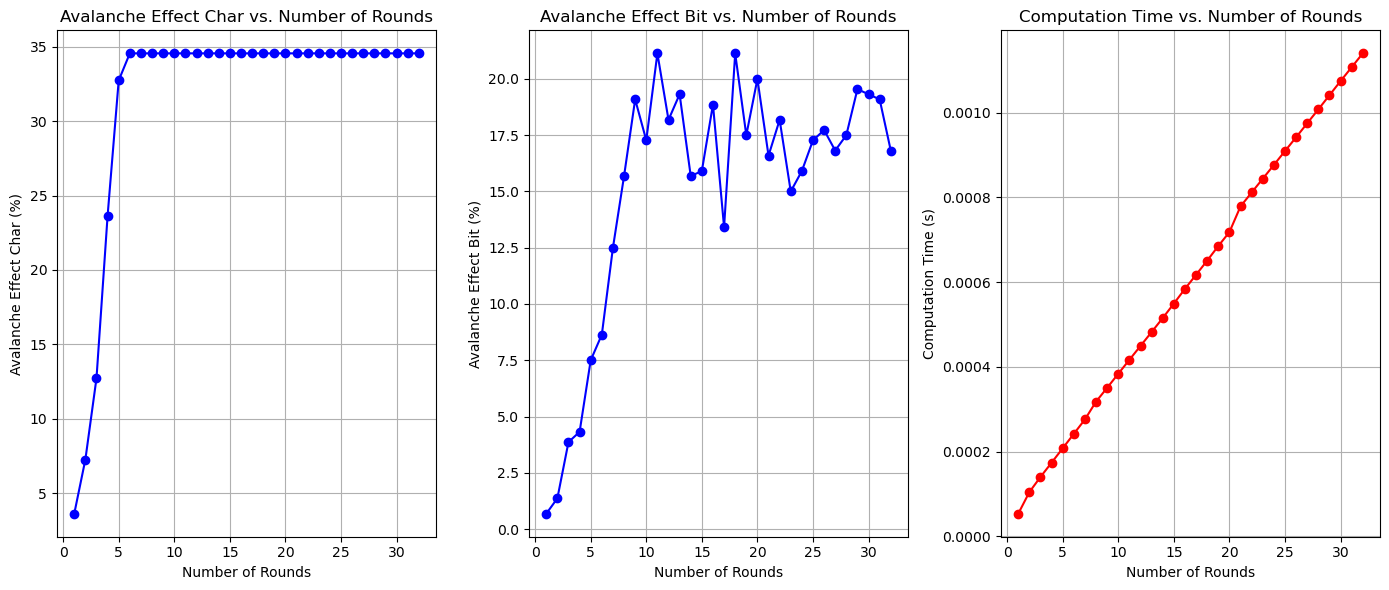

In [60]:
rounds = 32
avalanche_effects_char,avalanche_effects_bit, computation_times = repeated_avalanche_effect_all_ascii(plaintext, transposition_key, vigenere_key, rounds)

for round_num, (effect_char,effect_bit, time_taken) in enumerate(zip(avalanche_effects_char,avalanche_effects_bit, computation_times), start=1):
    print(f"Round {round_num}: diff_char_percentage = {effect_char:.2f}%, diff_bit_percentage = {effect_bit:.2f}%, Computation Time = {time_taken:.6f} seconds")
# Traccia i risultati
plt.figure(figsize=(14, 6))

# Effetto Valanga
plt.subplot(1, 3, 1)
plt.plot(range(1, rounds + 1), avalanche_effects_char, marker='o', color='b')
plt.title('Avalanche Effect Char vs. Number of Rounds')
plt.xlabel('Number of Rounds')
plt.ylabel('Avalanche Effect Char (%)')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(range(1, rounds + 1), avalanche_effects_bit, marker='o', color='b')
plt.title('Avalanche Effect Bit vs. Number of Rounds')
plt.xlabel('Number of Rounds')
plt.ylabel('Avalanche Effect Bit (%)')
plt.grid(True)
# Tempo di Computazione
plt.subplot(1, 3, 3)
plt.plot(range(1, rounds + 1), computation_times, marker='o', color='r')
plt.title('Computation Time vs. Number of Rounds')
plt.xlabel('Number of Rounds')
plt.ylabel('Computation Time (s)')
plt.grid(True)


plt.tight_layout()
plt.show()

The graph shows a strange behaviour, the avalanche effect rise till around 35% and then rimains constant, this is due to the key used for the transposition cipher that in this case is a symmetric key (45312), so the avalanche effect is limited by the key itself beacuse ciphering 2 times with this key is the same as ciphering and then deciphering.
Let's try with a different key.

Bit diversi: 3
char diversi: 2
º´¬ØÝ¿ËçºÔñ±ÞÕÍÓÕÐìÞÙç·çÄéá»ß²ËÓÝÓÔ§ÙÄ»ÈåÙß
º´¬ØÝ¿ËçºÔñ±ÞÕÍÓÕÐìÞÙç·çÄéáºß±ËÓÝÓÔ§ÙÄ»ÈåÙß
Bit diversi: 10
char diversi: 4
(.r­^,¬
%²YHw­©»v¤¢·y´&¥zØ¯Äk§ryI·@~Â
(.r­^,¬
%²YHw­©»u¤¢·y´&¥zØ¯Äk§ryI·@~Â
Bit diversi: 18
char diversi: 7
øjhÜÓ>H·Ã(J¬+6z[DÕc
¾,Ý­ f¢§ÅÀÔ1"ð.üøÈ×ÐÒ$+=%
¬+6z[DÕc'J
½,Ý¬ f¢§ÅÀÓ1"ï.üøÈ×ÐÒ$+=$
Bit diversi: 11
char diversi: 10
¥cOþh<'Ø©Ù:ôke¤æ¬	®éZÜ'Ø/ZZ=ë
¤cOþh<'Ø¨Ù:ôkd¤ä¬	¬éYÜ'Ø/ZZ=ë
Bit diversi: 30
char diversi: 18
¾;ráËïþÁÌ#]Æ*°Å¦qÅ¿¡AóÈEµöÞÁÃQMõóËaþ
¾;qáËï	üÁÌ!]Æ*°Å¥qÅ¿ AóÇEµõÞÁÁQMóóÉaþ
Bit diversi: 55
char diversi: 28
,ß$¢`à¹&ñPp<Ãä1egÃq¶ùêe4XÍNbW´mI£îÉ3»±dog4
,ß$¢`à¹&ñNm9Áã0egÃq¶ùêe2VÍK`V´lH£íÇ0º®bof4
Bit diversi: 114
char diversi: 43
«QÉtsZbp	è(áP)T} ºì·çêY!ÆÏ©`3ö´lx0SLn4dôpëººk
«QÆrsW]oè'àN(S}ý~·é´åéYÅÏ§`1ö´jv/RKm0cókê¹µi
Bit diversi: 140
char diversi: 51
¾

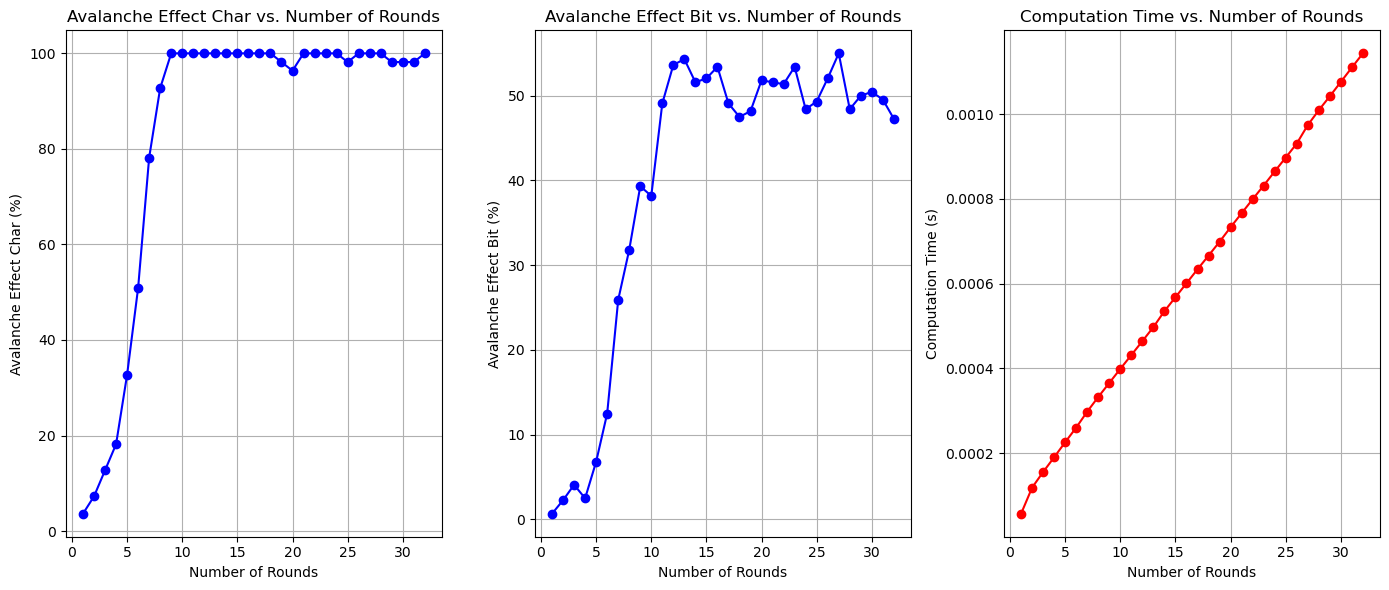

In [61]:
transposition_key="45321"
rounds = 32
avalanche_effects_char,avalanche_effects_bit, computation_times = repeated_avalanche_effect_all_ascii(plaintext, transposition_key, vigenere_key, rounds)

for round_num, (effect_char,effect_bit, time_taken) in enumerate(zip(avalanche_effects_char,avalanche_effects_bit, computation_times), start=1):
    print(f"Round {round_num}: diff_char_percentage = {effect_char:.2f}%, diff_bit_percentage = {effect_bit:.2f}%, Computation Time = {time_taken:.6f} seconds")
# Traccia i risultati
plt.figure(figsize=(14, 6))

# Effetto Valanga
plt.subplot(1, 3, 1)
plt.plot(range(1, rounds + 1), avalanche_effects_char, marker='o', color='b')
plt.title('Avalanche Effect Char vs. Number of Rounds')
plt.xlabel('Number of Rounds')
plt.ylabel('Avalanche Effect Char (%)')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(range(1, rounds + 1), avalanche_effects_bit, marker='o', color='b')
plt.title('Avalanche Effect Bit vs. Number of Rounds')
plt.xlabel('Number of Rounds')
plt.ylabel('Avalanche Effect Bit (%)')
plt.grid(True)
# Tempo di Computazione
plt.subplot(1, 3, 3)
plt.plot(range(1, rounds + 1), computation_times, marker='o', color='r')
plt.title('Computation Time vs. Number of Rounds')
plt.xlabel('Number of Rounds')
plt.ylabel('Computation Time (s)')
plt.grid(True)


plt.tight_layout()
plt.show()

Bit diversi: 12
char diversi: 12
º´¼ÛáÒ¹Ð$Å+G`T3E«ý§ðÐüÑ0Å+L:k2©¢¼¬­äØÒÂÇÅÖìíoA
º´¼ÛáÒ¸Ð$Å+GaT3D«ý§ðÐüÐ0Å+L:j2
©¢¼¬­åØÒÂÇÅÖìínA
Bit diversi: 31
char diversi: 15
,Ô4±KmFsZ^CïAÝ(÷¨HLÒDíSÑ?2Áä&sJÈü~L]{	Çÿ¥QaCä^ÉVö
,Ó4±JmFrZZCïCÝ(÷¨OLÒDíSÒ? 2Ãä&sHÈã~L]{	Æÿ¹QaCä^ÉVö
Bit diversi: 80
char diversi: 29
¸
§?r¡b¶BøNðÃFç{w$·mJl¨ 3¹Q¯ÉåôhYê-!*s¢Þ=lp
·
¦?r¡a¶BûNðÃ½Lç¤{w$mBl¢3¹Q¦É0æôhYÍ-(!s©¡Þ=lOp
Bit diversi: 125
char diversi: 42
òûê	À2øI=»dÙÜN$WI¨S7ÂO#°~ÆP°+ÖÕÔç¥¬GêÀð6*Bô:
ñûéÀ1öIX=½^.ÙÐ@¢WGãÖ[=Â«#¤6´ °"$Õ-E¥Ç®à Ô682ôJË
Bit diversi: 168
char diversi: 48
MbòRKDêE
8O½sXRçpÇî÷ÏDá.q'
0T©-¯\¹ÏËº(ÕdßÚ¸%2
L`ðPIDçE×9geVR£ç½,,¢NÃÑDXÜûéá2c©«¡g9(áÑË2(»çÒàË2 
Bit diversi: 183
char diversi: 54
 XÁImth÷úDý¥Ø~îÐÃ¥¼3óøj0"IDªêmÔÑ]£l¶Ld
;,q4G2O°fT¿Ä+¿=eØþR®YóôTf9úÞ>ÔImïâN:Úí9 eÿ+zÞAIúìU
Bit diversi: 211
char diversi: 60
chEÅ3?8 ¥7KzþÌx	V¼úÛbÙ_b5,
­Åä¡£ÜÚÿì©u3V

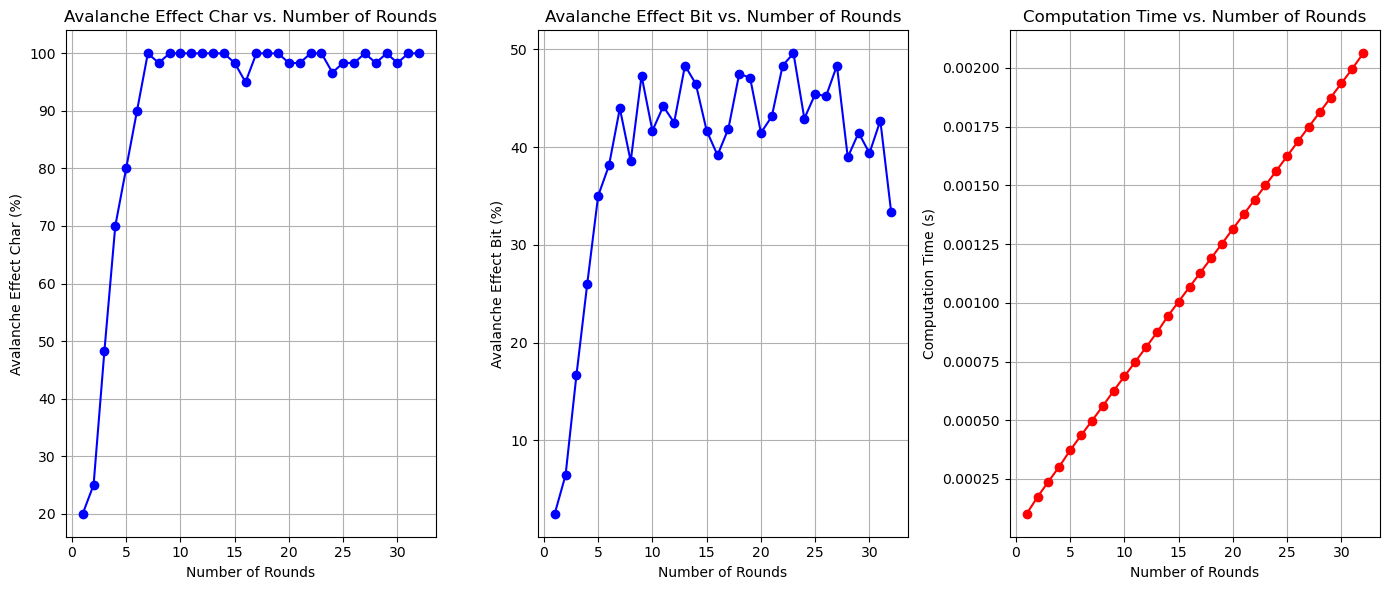

In [62]:
rounds = 32
avalanche_effects_char,avalanche_effects_bit, computation_times = repeated_avalanche_effect_CBC(plaintext, transposition_key, vigenere_key, rounds)
for round_num, (effect_char,effect_bit, time_taken) in enumerate(zip(avalanche_effects_char,avalanche_effects_bit, computation_times), start=1):
    print(f"Round {round_num}: diff_char_percentage = {effect_char:.2f}%, diff_bit_percentage = {effect_bit:.2f}%, Computation Time = {time_taken:.6f} seconds")
# Traccia i risultati
plt.figure(figsize=(14, 6))

# Effetto Valanga
plt.subplot(1, 3, 1)
plt.plot(range(1, rounds + 1), avalanche_effects_char, marker='o', color='b')
plt.title('Avalanche Effect Char vs. Number of Rounds')
plt.xlabel('Number of Rounds')
plt.ylabel('Avalanche Effect Char (%)')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(range(1, rounds + 1), avalanche_effects_bit, marker='o', color='b')
plt.title('Avalanche Effect Bit vs. Number of Rounds')
plt.xlabel('Number of Rounds')
plt.ylabel('Avalanche Effect Bit (%)')
plt.grid(True)
# Tempo di Computazione
plt.subplot(1, 3, 3)
plt.plot(range(1, rounds + 1), computation_times, marker='o', color='r')
plt.title('Computation Time vs. Number of Rounds')
plt.xlabel('Number of Rounds')
plt.ylabel('Computation Time (s)')
plt.grid(True)


plt.tight_layout()
plt.show()

In [63]:
print(f"Plaintext: {plaintext}")

encrypted_message = encrypt_cbc(plaintext, transposition_key, vigenere_key)
print(f"Cyphertext: {encrypted_message}")

decrypted_message = decrypt_cbc(encrypted_message, transposition_key, vigenere_key)
print(f"Decrypted text: {decrypted_message}")

Plaintext: Marco Bologna Security and Vulnerability in Networks
Cyphertext: º´¼ÛáÒ¹Ð$Å+G`T3E«ý§ðÐüÑ0Å+L:k2©¢¼¬­äØÒÂÇÅÖìíoA
Decrypted text: Marco Bologna Security and Vulnerability in Networks


In [64]:
current_text = plaintext
print(f"Plaintext: {plaintext}")
for i in range(16):
    encrypted_text = encrypt_cbc(current_text, transposition_key, vigenere_key)

    current_text = encrypted_text

print(f"Cyphertext: {encrypted_text}")

for i in range(16):
    decrypted_text = decrypt_cbc(encrypted_text, transposition_key, vigenere_key)
    encrypted_text = decrypted_text

print(f"Decrypted text: {decrypted_text}")

Plaintext: Marco Bologna Security and Vulnerability in Networks
y"s÷TRÌ¦ñ!¡±»fÇÔN´î>3.Ë*=4Édñæ?¿È²³øÛ¬·
ÆÐt¾
Decrypted text: Marco Bologna Security and Vulnerability in Networks
